In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [24]:
inSize = 64 * 32 * 2
nTrainingData = 101
velocities = []
obstaclePos = []

In [25]:
# reading example images
tmp = 0
for i in range(nTrainingData):
    filename = "./vel_%s.npy"
    path = filename % (str(i))
    content = np.load(path)
    velocities.append(content)
    obstaclePos.append([tmp])
    tmp += 1
    
velocities = velocities / np.amax(velocities)

In [26]:
loadNum = len(velocities)
velocities = np.reshape( velocities, (len(velocities), 32, 64, 2) )
obstaclePos = np.reshape( obstaclePos, (len(velocities), 1))
loadNum = velocities.shape[0]


In [27]:
# full connected neural network
with tf.device('/gpu:0'):
    x = tf.placeholder(tf.float32, shape=[None, 1])
    y = tf.placeholder(tf.float32, shape=[None, 32, 64, 2])

    # xIn = tf.reshape(x, shape=[-1, inSize ]) # flatten
    fc_1w = tf.Variable(tf.random_normal([1, 256], stddev=0.01))
    fc_1b   = tf.Variable(tf.random_normal([256], stddev=0.01))

    fc1 = tf.add(tf.matmul(x, fc_1w), fc_1b)
    fc1 = tf.nn.relu(fc1)
    # fc1 = tf.nn.dropout(fc1, 0.9) # plenty of dropout...

    fc_2w = tf.Variable(tf.random_normal([256, inSize], stddev=0.01))  # back to input size
    fc_2b = tf.Variable(tf.random_normal([inSize], stddev=0.01))

    y_pred = tf.add(tf.matmul(fc1, fc_2w), fc_2b)
    y_pred = tf.reshape( y_pred, shape=[-1, 32, 64, 2])

    cost = tf.nn.l2_loss(y - y_pred) 
    opt  = tf.train.AdamOptimizer(0.001).minimize(cost)
    
    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())

    trainingEpochs = 50000
    for epoch in range(trainingEpochs):    
        _ , currentCost = sess.run([opt, cost], feed_dict={x: obstaclePos, y: velocities})
        if(epoch%200 is 0):
            print("Epoch %d/%d: cost %f " % (epoch, trainingEpochs, currentCost) )
    print("Done")

Epoch 0/50000: cost 2074.311768 
Epoch 200/50000: cost 376.448181 
Epoch 400/50000: cost 327.040894 
Epoch 600/50000: cost 294.984406 
Epoch 800/50000: cost 280.370758 
Epoch 1000/50000: cost 266.196045 
Epoch 1200/50000: cost 257.725006 
Epoch 1400/50000: cost 253.972122 
Epoch 1600/50000: cost 246.358932 
Epoch 1800/50000: cost 241.062073 
Epoch 2000/50000: cost 236.979965 
Epoch 2200/50000: cost 232.640137 
Epoch 2400/50000: cost 233.901123 
Epoch 2600/50000: cost 227.110672 
Epoch 2800/50000: cost 222.218994 
Epoch 3000/50000: cost 219.364838 
Epoch 3200/50000: cost 214.088669 
Epoch 3400/50000: cost 210.247574 
Epoch 3600/50000: cost 208.212097 
Epoch 3800/50000: cost 202.465210 
Epoch 4000/50000: cost 199.529694 
Epoch 4200/50000: cost 200.429535 
Epoch 4400/50000: cost 194.618500 
Epoch 4600/50000: cost 189.567139 
Epoch 4800/50000: cost 192.103165 
Epoch 5000/50000: cost 187.893494 
Epoch 5200/50000: cost 185.298691 
Epoch 5400/50000: cost 180.040543 
Epoch 5600/50000: cost 181

Epoch 46000/50000: cost 124.395912 
Epoch 46200/50000: cost 127.397766 
Epoch 46400/50000: cost 127.499886 
Epoch 46600/50000: cost 123.640259 
Epoch 46800/50000: cost 126.598938 
Epoch 47000/50000: cost 126.777550 
Epoch 47200/50000: cost 124.605507 
Epoch 47400/50000: cost 124.198433 
Epoch 47600/50000: cost 127.339188 
Epoch 47800/50000: cost 125.573151 
Epoch 48000/50000: cost 124.222252 
Epoch 48200/50000: cost 127.033920 
Epoch 48400/50000: cost 123.889824 
Epoch 48600/50000: cost 124.876442 
Epoch 48800/50000: cost 125.495209 
Epoch 49000/50000: cost 128.087448 
Epoch 49200/50000: cost 123.899429 
Epoch 49400/50000: cost 126.693420 
Epoch 49600/50000: cost 125.654106 
Epoch 49800/50000: cost 124.799469 
Done


In [28]:
from scipy import misc
img = sess.run(y_pred, feed_dict={x: np.reshape([50], (1, 1))})
# misc.imsave("./test_data.png", img)
img = img[0]

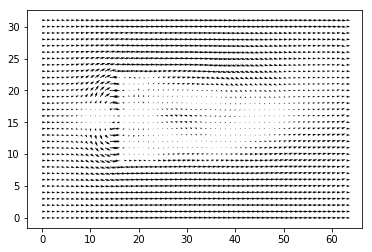

In [29]:
%matplotlib inline  
# predicted image
X, Y = np.meshgrid(np.arange(0, 64, 1), np.arange(0, 32, 1))
x_part = img[:, :, 0]
y_part = img[:, :, 1]
Q = plt.quiver(X, Y, x_part, y_part, units='width')
plt.figure()

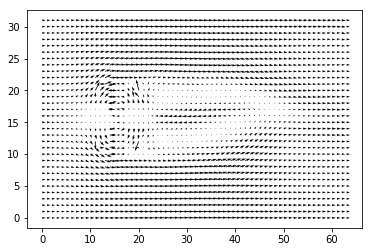

In [22]:
# input image
X, Y = np.meshgrid(np.arange(0, 64, 1), np.arange(0, 32, 1))
x_part = velocities[50, :, :, 0]
y_part = velocities[50, :, :, 1]
Q = plt.quiver(X, Y, x_part, y_part, units='width')
plt.figure()